<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%86%B5%EA%B3%84/Chapter_1_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_jeong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1. 탐색적 데이터 분석
- 고전 통계학에서는 추론의 개념 중요
    - 추론(inference) : 적은 샘플로 더 큰 모집단에 대한 결론을 도출하기 위한 과정<br><br>
- 존투키
    - '데이터분석의 미래'(1962)라는 논문으로 통계적 추론을 하나의 구성요소로 보는 데이터분석 이라는 과학적 학문을 제안
    - 탐색적데이터분석(1977)을 통해 요약통계량(평균, 중앙값, 분위수)과 함께 데이터집합을 그림으로 표현하는데 도움이 되는 간단한 도표(상자그림, 산점도...) 제시 <br><br>
- 데이터 종류
    - 수치형(numeric) : 숫자를 이용해 표현할 수 있는 데이터
    - 연속형(continuous) : 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터 (유의어 : 구간형, 실수형, 수치형)
    - 범주형(categorical) : 가능한 범주안읭 값만을 취하는 데이터
    (유의어 : 목혹,열거, 요인,명목, 다항형)
    - 이산형(discrete) : 횟수와 같은 정수 값만 취할 수 있는 데이터
    (유의어: 정수형, 횟수)
    - 이진형(binary) : 두개의 값만을 갖는 범주형 데이터의 특수한 경우 (유의어: 이항적, 논리형, 지표, 불리언 데이터)
    - 순서형(ordinal) : 값 사이 분명한 순위가 있는 범주형 데이터 (유의어:정렬된 요인데이터 <br><br>
- 데이터 종류 구분 필요성
    - 차트생성/모델피팅 등 수행 방식 결정
        - 예> 순서형데이터 OrdinalEncoder 처리 등
    - RDB 처럼 저장소/인덱싱 최적화에 사용
        - 소프트웨어 에서 데이터 종류 결정하는 것은 해당 데이터를 어떻게 처리할지 정하는 것과 같다
    - 범주형 변수가 취할 수 있는 값은 소프트웨어적으로 처리가능 (enum처럼)<br><br>
- 테이블데이터 : 데이터분석에서 가장 대표적으로 사용되는 객체는 엑셀의 테이블과 같은 테이블데이터임
    - 데이터프레임 (dataframe) : 엑셀의 테이블 형태와 같은 구조
    - 피처 (feature) : 컬럼, 특성, 속성, 변수, (좁은의미로 쓸때) 입력
    - 결과 (output) : 종속변수, 응답, 타겟, 출력
    - 레코드 (record) : 데이터프레임의 각 행 (기록값, 사건, 사례, 샘플, 관측값 등)<br><br>
- 요약통계량 주요용어
    - 평균(mean):총합을갯수로 나눈값
        - 가중평균(weighted mean): 가중치곱한값의 총합을 가중치합으로 나눈값
    - 중간값(median):가운데위치한값(=50번째 백분위수)
    - 최빈값(mode):가장많이나오는값
    - 백분위수(percentile) : 전체데이터의 p% 아래에두는말(=분위수(quantile))
    - 절사평균(trimmed mean) : 정해진 개수의 극단값 제외한 나머지값의 평균(=truncated mean)
    - 로버스트하다(robust) : 극단값의 영향을 크게받지 않음 (=저항성있음)
    - 특이값(outlier) : 대부분값과 매우 다른 데이터값 (=극단값)
    

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
# !pip install wquantiles
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

데이터 경로 설정

In [ ]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

### 예제 : 인구에 따른 살인비율의 위치추정

In [ ]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


평균, 절사평균, 중간값 계산

In [ ]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3


In [ ]:
from scipy.stats import trim_mean

print(trim_mean(state['Population'], 0.1))
print(help(trim_mean))

4783697.125
Help on function trim_mean in module scipy.stats._stats_py:

trim_mean(a, proportiontocut, axis=0)
    Return mean of array after trimming distribution from both tails.
    
    If `proportiontocut` = 0.1, slices off 'leftmost' and 'rightmost' 10% of
    scores. The input is sorted before slicing. Slices off less if proportion
    results in a non-integer slice index (i.e., conservatively slices off
    `proportiontocut` ).
    
    Parameters
    ----------
    a : array_like
        Input array.
    proportiontocut : float
        Fraction to cut off of both tails of the distribution.
    axis : int or None, optional
        Axis along which the trimmed means are computed. Default is 0.
        If None, compute over the whole array `a`.
    
    Returns
    -------
    trim_mean : ndarray
        Mean of trimmed array.
    
    See Also
    --------
    trimboth
    tmean : Compute the trimmed mean ignoring values outside given `limits`.
    
    Examples
    --------
   

In [ ]:
print(state['Population'].median())

4436369.5


가중평균은 넘파이 및 wquantiles에서 가능하다

- [`wquantiles`](https://pypi.org/project/wquantiles/).

In [ ]:
print(state['Murder.Rate'].mean())

4.066


In [ ]:
# 넘파이 가중평균
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [ ]:
import wquantiles
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


- 가중평균을 사용하는 이유
    - 어떤 값이 본래 다른 값에 비해 큰 변화량 갖지만, 작은 변화량 주고싶을때
        - 예> 여러센서의 평균 책정시, 한 센서의 정확도 떨어진다면 낮은 가중치
    - 샘플특성 보완을 위해 소수 그룹에 높은 가중치를 주고 싶을 때

## 변동성(Variability) 예측
- 용어 정리
    - 편차(deviation):관측값과 추정값 간 차이(=오차, 잔차), 중앙값을 주변으로 데이터가 얼마나 퍼져있는지 알수 있음
    - 분산(variance):편차제곱합을 n-1로 나눈값(=평균제곱오차)
    - 표준편차(standard deviation):분산의 제곱근
    - 평균절대편차(mean absolute deviation):평균과의 편차의 절대값의 평균(=l1노름, 맨해튼노름)
    - 중간값의 중위절대편차(MAD):중간값과의 편차의 절대값의 중간값
    - 범위(range):최대값-최소값
    - 순서통계량(order statistics):최소에서 최대까지 정렬된 데이터값에 따른 계량형(=순위)
    - 사분위범위(IQR):75분위수-25분위수


In [ ]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


표준편차

In [ ]:
print(state['Population'].std())

6848235.347401142


IQR

In [ ]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


MAD 는 from statsmodels import robust로 구해짐

In [ ]:
from statsmodels import robust

print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


### 데이터 분포 탐색 : Percentiles, Boxplots
_Pandas_ has the `quantile` method for data frames.

In [ ]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [ ]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


- 박스플럿 해석하기
    - 중간값이 5백만 이고 (가운데 줄)
    - 주 절반이 2백~7백만 사이이며 (상자의 위/아랫부분)
    - 최대/최소가 13백만, 1백만 수준 (median +- 1.5IQR으로 위/아래 선)
    - 특이값은 원으로 표시

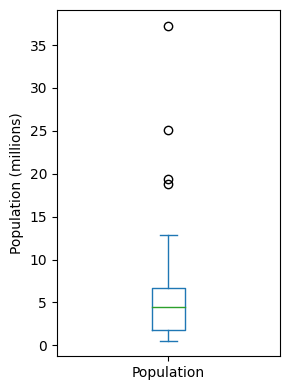

In [ ]:
ax = (state['Population']/1_000_000).plot(kind='box',figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

### 도수분포표, 히스토그램
판다스의 `cut` 메소드로 원하는 개수의 구간(bin) 나눔
- value_counts()로 구간 별 도수 시리즈 생성

In [ ]:
# 10개의 구간으로 나누어 갯수를 확인
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

- 빈도의 크기는 어떻게 정할까
    - 구간이 크면 분포를 나타내는 중요한 특징을 놓칠 수 있음.<br>
    - 반대로 너무 작아도 결과가 너무 크게 쪼개져 있어서 큰그림을 볼수 없게됨

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for bin_ , df_ in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': bin_,
        'Count': len(df_),
        'States': ','.join(df_['Abbreviation'])
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


- 히스토그램으로 인구범위별 분포도 파악
    - 그래프에 빈 구간이 있을수 있음
    - 구간은 동일한 크기를 갖음
    - 구간의 수/크기는 사용자가 결정할 수 있음
    - 빈구간이 잇지 않은 이상 막대사이는 공간없이 붙어있음
<br><br>


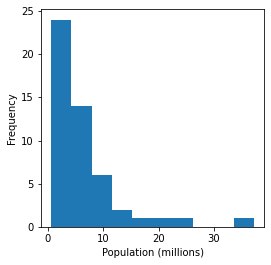

In [ ]:
ax = (state['Population'] / 1000000).plot(kind='hist',figsize=(4, 4))
ax.set_xlabel('Population (millions)');

> - 통계학에서 말하는 모멘트 <br>
 위치와 변이는 각각 분포의 일차 및 이차 모멘트(적률)라 한다.  <br>
 삼차, 사차 모멘트는 왜도(skewness), 첨도(kurtosis)임 <br>
 보통 모멘트값은 시각화하여 보로 확인함 <br>

### 밀도 그림과 추정
density를 매개변수 통해 밀도추정 가능. density매소드는 부드러운 곡선으로 보여줌

- hist 의 기본은 빈도추정

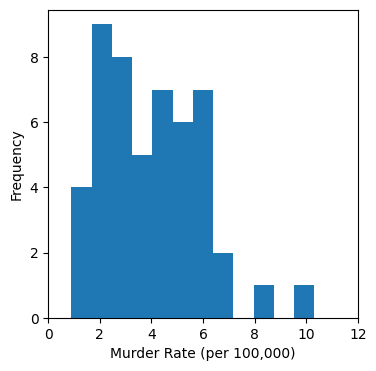

In [ ]:
ax = state['Murder.Rate'].plot(kind='hist', xlim=[0, 12],
                                    bins= 12, figsize=(4, 4))
ax.set_xlabel('Murder Rate (per 100,000)');

- density = True로 밀도추정으로 변환

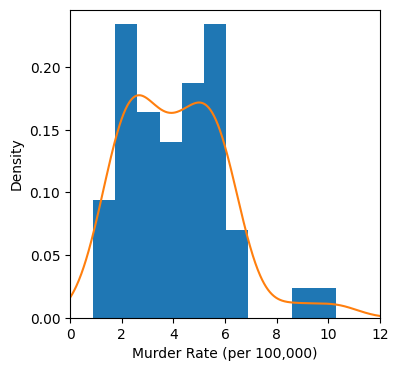

In [ ]:
ax = state['Murder.Rate'].plot(kind='hist',density=True,  xlim=[0, 12],
                                    bins=11, figsize=(4, 4))
state['Murder.Rate'].plot(kind ='density', ax=ax) # ax=ax 매개변수를 통해 두개이상의 그래프 그려줌
ax.set_xlabel('Murder Rate (per 100,000)');

## 이진형 데이터와 범주형 데이터 탐색
- 용어 정리
    - 최빈값(mode):데이터에서 가장 자주 등장하는 범주 또는 값
    - 기대값(expected value):범주에 해당하는 어떤 수치가 있을때, 범주의 출현확률에 따른 평균
    - 막대도표(bar chart):각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
    - 파이그림(pie chart):각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 그린그림

In [ ]:
# Table 1-6 : 델러스-포스워스 공항의 항공기 운행 지연 원인별 퍼센트비율
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
100 * dfw / dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


- 막대도표는 범주형을 보여줄 때 주로 사용되며, 흔히 사용
    - 파이차트와 유사하나 통계학자/시각화전문가는 파이차트가 시각적으로 효과적이지 않다는 이유로 잘 사용하지 않는다

- 막대도표는 히스토그램과 유사하나 차이점이 있다. (범주형 vs 연속형)
    - 막대도표는 x축에 요인변수의 범주를 나타내나, 히스토그램은 x축에 수치 가능한 하나의 변수값 의미
    - 막대도표는 서로 떨어져 있으나, 히스토그램은 일반적으로 떨어져있으면 그 범위에 해당값이 존재하지 않음을 뜻함

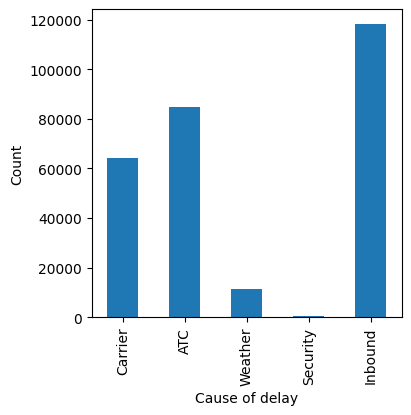

In [ ]:
ax = dfw.transpose().plot(kind='bar',figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count');

[오해를 일으킬 수 있는 그래프에 대해 읽어보자](https://en.wikipedia.org/wiki/Misleading_graph)

## 상관관계
- 탐색적 데이터 분석 과정에서 예측값 간 , 예측값과 목표값 간의 상관관계 확인은 빼놓을 수 없음
- [상관계수는 특이값에 민감. 로버스트한 방법 접근으로 sklearn.covariance 메서드는 다양한 방식 제공](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.covariance)

In [ ]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

- 특정섹터 주식 및 ETF의 일간 수익사이의 상관관계 확인

In [ ]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', # index
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']] #column
etfs.corr()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


SPY, DIA는 높은 상관성, 주로 테크회사로 구성된 QQQ, XLK도 높음. 반면 GLD(금), USO(유가), VXX(시장변동성) 관련된 상품은 음의 상관성

- 상관성은 HEATMAP 시각화

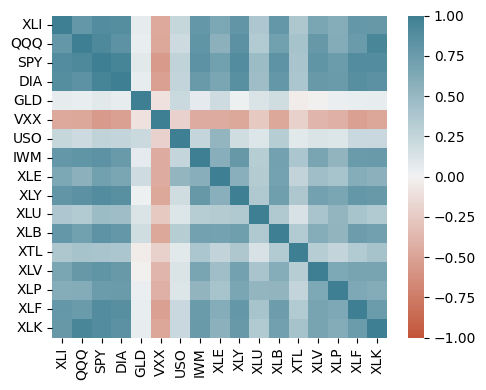

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

방향성 및 크기를 함께 표현위해 타원(ellipses) 활용

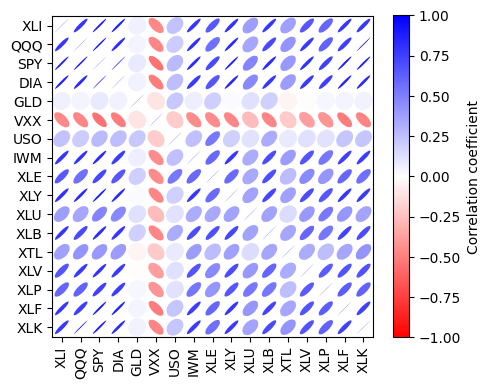

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

얇고 진할수록 더 큰 상관관계를 보임

### Scatterplots
Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

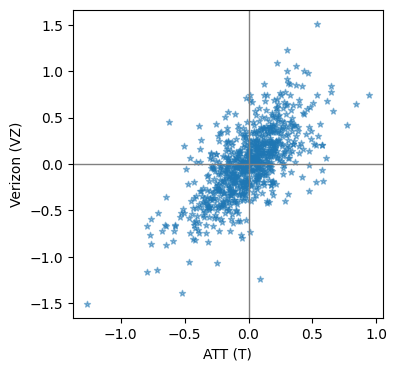

In [ ]:
ax = telecom.plot(kind='scatter', x='T', y='VZ', figsize=(4, 4), marker='*', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1);

## 두개 이상의 변수 탐색하기
- 셋 이상의 변수를 다루는 분석 (다변량분석, multivariante analysis)
    - 평균/분산 등 한번에 하나의 변수를 다루는 것(일변량분석, univariante analysis)
    - 상관분석 등 두변수를 다룸(이변량분석, bivariate analysis)
    <br><br>
- 용어정리
    - 분할표 (contingency table): 두가지 이상의 범주형 변수의 빈도수를 기록한 표
    - 육각형 구간 (hexagonal binning): 두변수를 육각형 모양의 구간으로 나눈 그림
    - 등고 도표 (contour plot): 지도상에 같은 높이의 지점을 등고선으로 나타내는 것처럼, 두 변수의 밀도를 등고선으로 표시한 도표
    - 바이올린 도표 (violin plot) : 상자그림과 비슷하지만 밀도추정을 함께 보여줌

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


### 수치형 vs 수치형
#### 육각형 구간 및 등고선 (Hexagonal binning and Contours)

- 기존의 산점도는 데이터의 수가 적을 때는 괜찮으나 수십/수백만의 레코드를 나타내기엔 너무 밀집되어 알아보기 어려움
    - hexbin 을 통한 밀도색으로 표시하면 직관적으로 구분이 가능함

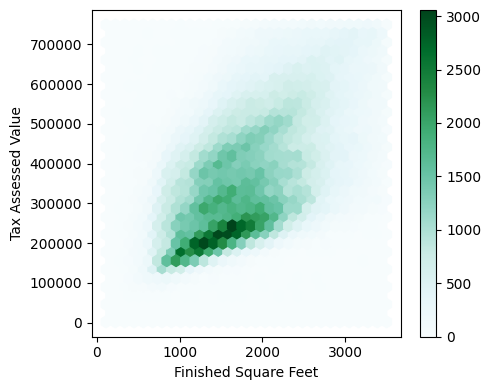

In [ ]:
ax = kc_tax0.plot(kind = 'hexbin', x='SqFtTotLiving', y='TaxAssessedValue',
                  gridsize=30, sharex=True, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

seaborn의 kdeplot함수로 등고선 도표를 생성

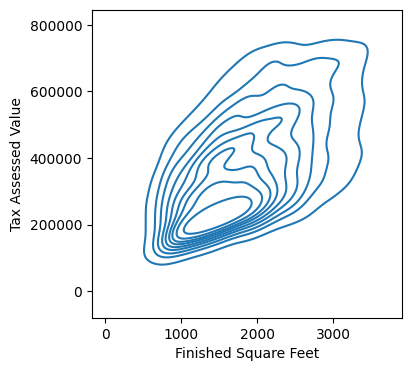

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
# sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value');

### 범주형과 범주형
Load the `lc_loans` dataset

In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [ ]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### 범주형과 수치형
_Pandas_ boxplots of a column can be grouped by a different column.

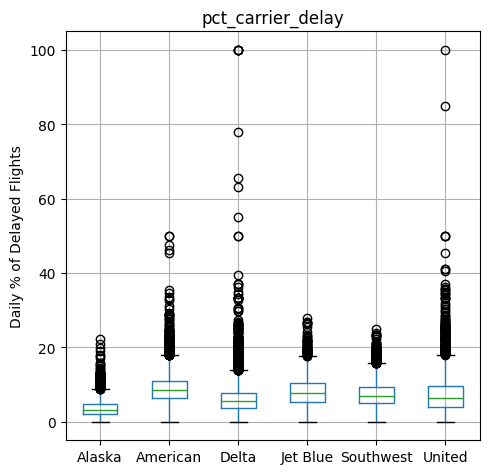

In [ ]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ also supports a variation of boxplots called _violinplot_.

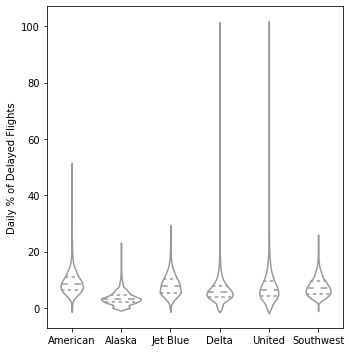

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 다변수 시각화

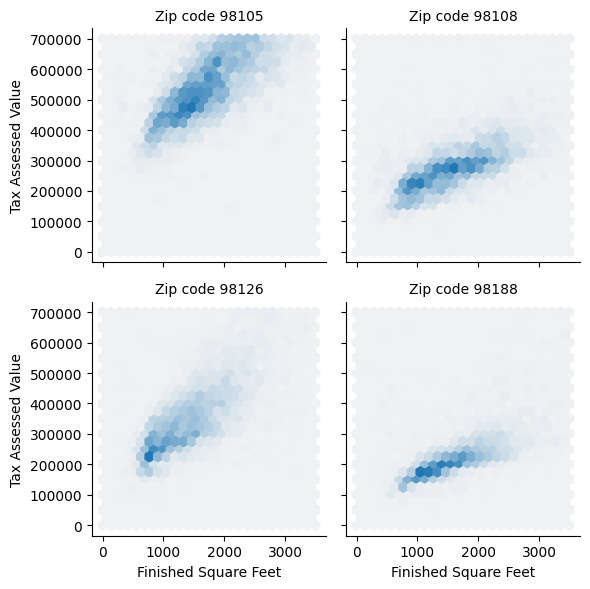

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()